In [1]:
from source import data_import
import pyarrow as pa

In [2]:
# example save default single patient to disc
data_import.save_pyarrow_eeg_single()

chb03_01.edf was import but not resampled 256Hz.
chb03_01.edf seizure and buffer was labeled
chb03_02.edf was import but not resampled 256Hz.
chb03_02.edf seizure and buffer was labeled
chb03_03.edf was import but not resampled 256Hz.
chb03_03.edf seizure and buffer was labeled
chb03_04.edf was import but not resampled 256Hz.
chb03_04.edf seizure and buffer was labeled
chb03_05.edf was import but not resampled 256Hz.
chb03_06.edf was import but not resampled 256Hz.
chb03_07.edf was import but not resampled 256Hz.
chb03_08.edf was import but not resampled 256Hz.
chb03_09.edf was import but not resampled 256Hz.
chb03_10.edf was import but not resampled 256Hz.
chb03_11.edf was import but not resampled 256Hz.
chb03_12.edf was import but not resampled 256Hz.
chb03_13.edf was import but not resampled 256Hz.
chb03_14.edf was import but not resampled 256Hz.
chb03_15.edf was import but not resampled 256Hz.
chb03_16.edf was import but not resampled 256Hz.
chb03_17.edf was import but not resample

In [3]:
# load single patient via memory mapping
df = data_import.load_eeg_single_mem()
df.shape

/home/weasel/reps/ai-seizure-detectives/source/../data/eeg_single.arrow was loaded.


(35022336, 25)

<Axes: >

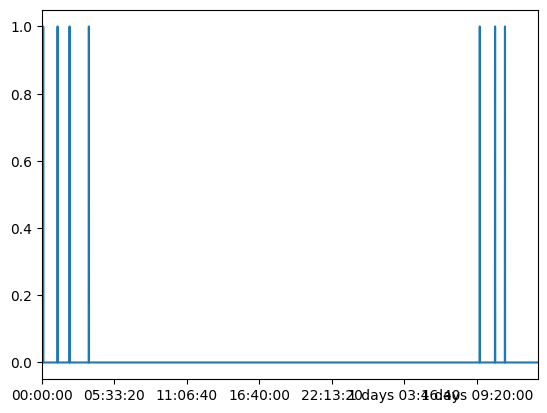

In [4]:
df.is_seizure.astype(int).plot()

In [6]:
df.mean()

channel
FP1-F7            0.234281
F7-T7             0.250443
T7-P7             0.138292
P7-O1             0.216271
FP1-F3            0.241179
F3-C3             0.204992
C3-P3             0.198572
P3-O1             0.195276
FP2-F4            0.238687
F4-C4             0.209138
C4-P4             0.196704
P4-O2             0.197154
FP2-F8            0.237827
F8-T8             0.250806
T8-P8-0           0.141671
P8-O2             0.203337
FZ-CZ             0.215238
CZ-PZ             0.195880
P7-T7             0.252428
T7-FT9            0.151716
FT9-FT10          0.201606
FT10-T8           0.244361
T8-P8-1           0.141671
is_seizure        0.002990
before_seizure    0.015401
dtype: float64

In [4]:
p_df = data_import.import_patients(patient_ids=[1,2,3,5], seizure_flag=True)

chb01_03.edf was import but not resampled 256Hz.
chb01_03.edf seizure and buffer was labeled
chb01_04.edf was import but not resampled 256Hz.
chb01_04.edf seizure and buffer was labeled
chb01_15.edf was import but not resampled 256Hz.
chb01_15.edf seizure and buffer was labeled
chb01_16.edf was import but not resampled 256Hz.
chb01_16.edf seizure and buffer was labeled
chb01_18.edf was import but not resampled 256Hz.
chb01_18.edf seizure and buffer was labeled
chb01_21.edf was import but not resampled 256Hz.
chb01_21.edf seizure and buffer was labeled
chb01_26.edf was import but not resampled 256Hz.
chb01_26.edf seizure and buffer was labeled
patient chb01 sessions concatenated.
chb02_16+.edf was import but not resampled 256Hz.
chb02_16+.edf seizure and buffer was labeled
chb02_16.edf was import but not resampled 256Hz.
chb02_16.edf seizure and buffer was labeled
chb02_19.edf was import but not resampled 256Hz.
chb02_19.edf seizure and buffer was labeled
patient chb02 sessions concaten

In [ ]:
# show memory in cli. this is only working for linux.
# !vmstat 

procs -----------memory---------- ---swap-- -----io---- -system-- ------cpu-----
 r  b   swpd   free   buff  cache   si   so    bi    bo   in   cs us sy id wa st
 3  0      0 13330000 187844 2092148    0    0   178     3   25   52  1  0 99  0  0


In [5]:
# to save a dataframe for memory mapping
data_import.save_pyarrow(p_df, file_name="my_data")

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/my_data.arrow was successfully written.


In [6]:
# to load it with memory mapping
p_df_mem = data_import.load_pyarrow(file_name="my_data")
p_df_mem.shape

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/my_data.arrow was loaded.


(19272704, 25)

<Axes: >

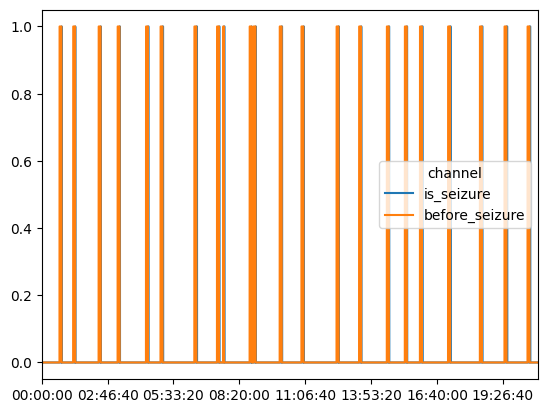

In [7]:
p_df_mem.loc[:, ['is_seizure', 'before_seizure']].astype(int).plot()

In [11]:
p_df_mem.head()

channel,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,is_seizure,before_seizure
0 days 00:00:00,-17.777778,39.267399,-3.711844,8.400488,-0.586081,4.102564,37.704518,-15.042735,-17.387057,-45.128205,...,180.317460,-18.559219,85.372405,4.102564,20.903541,-9.181929,-39.65812,-59.97558,False,False
0 days 00:00:00.003906250,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536,False,False
0 days 00:00:00.007812500,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.19536,0.19536,False,False
0 days 00:00:00.011718750,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,-0.195360,0.195360,0.586081,...,2.148962,0.586081,0.586081,0.195360,1.367521,-0.195360,-0.19536,0.19536,False,False
0 days 00:00:00.015625,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,2.148962,0.195360,0.195360,0.195360,-0.195360,0.195360,0.19536,0.19536,False,False
